# Stat 301 Group 2 Project 

Yuechang Liu

## Table of Contents:
1. [Description](#Description)
2. [Cleaning](#cleaning)
3. [Visualization](#visualization)

In [1]:
# Load the Libraries
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(faux)

# set seed number for the project
seed_num <- 1111

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



************
Welcome to faux. For support and examples visit:
https://debruine.github.io/faux/
- Get and set global package options with: faux_options()
************



kaggle Link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
df <- read_csv("winequality-red.csv")

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1. Description <a id='Description'></a>
The data set we selected is related to red and white variants of the Portuguese "Vinho Verde" wine. The variables are physicochemical qualities of the wine including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,sulphates, alcohol and an associated quality score. This data was collected from red and white wine samples where physicochemical qualities were from objective tests such as a pH tests and the quality score was based on experts grading the wine quality between 0 (very bad) and 10 (very excellent).

In [3]:
# Total count of the data
count(df)

n   
1 1599

In [4]:
# get a sense of what the data look like
head(df,10)

fixed acidity volatile acidity citric acid residual sugar chlorides
1   7.4          0.70             0.00        1.9            0.076    
2   7.8          0.88             0.00        2.6            0.098    
3   7.8          0.76             0.04        2.3            0.092    
4  11.2          0.28             0.56        1.9            0.075    
5   7.4          0.70             0.00        1.9            0.076    
6   7.4          0.66             0.00        1.8            0.075    
7   7.9          0.60             0.06        1.6            0.069    
8   7.3          0.65             0.00        1.2            0.065    
9   7.8          0.58             0.02        2.0            0.073    
10  7.5          0.50             0.36        6.1            0.071    
   free sulfur dioxide total sulfur dioxide density pH   sulphates alcohol
1  11                   34                  0.9978  3.51 0.56       9.4   
2  25                   67                  0.9968  3.20 0.68       9.8   
3  15                   54                  0.9970  3.26 0.65       9.8   
4  17                   60                  0.9980  3.16 0.58       9.8   
5  11                   34                  0.9978  3.51 0.56       9.4   
6  13                   40                  0.9978  3.51 0.56       9.4   
7  15                   59                  0.9964  3.30 0.46       9.4   
8  15                   21                  0.9946  3.39 0.47      10.0   
9   9                   18                  0.9968  3.36 0.57       9.5   
10 17                  102                  0.9978  3.35 0.80      10.5   
   quality
1  5      
2  5      
3  5      
4  6      
5  5      
6  5      
7  5      
8  7      
9  7      
10 5

In [5]:
summary(df)

 fixed acidity   volatile acidity  citric acid    residual sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [6]:
data.frame(sapply(df, mean))

sapply.df..mean.
fixed acidity         8.31963727     
volatile acidity      0.52782051     
citric acid           0.27097561     
residual sugar        2.53880550     
chlorides             0.08746654     
free sulfur dioxide  15.87492183     
total sulfur dioxide 46.46779237     
density               0.99674668     
pH                    3.31111320     
sulphates             0.65814884     
alcohol              10.42298311     
quality               5.63602251

### Question: Can we predict the quality rating of red wine (response variable) based on its chemical properties such as acidity, pH level, alcohol content, and volatile acidity (explanatory variables)?

This question focuses on prediction using regression analysis. The goal is to build a regression model that can accurately predict the quality rating of red wine based on its chemical properties. By analyzing the relationship between the response variable (quality rating) and the explanatory variables (chemical properties), we can develop a predictive model that can estimate the quality rating of red wine samples not included in the dataset.

The dataset contains information about different chemical properties of red wines along with their quality ratings. By fitting a regression model to the data, we can identify the relationship between the chemical properties and the quality rating. This model can then be used to predict the quality rating of new or unseen red wine samples based on their chemical properties.

The analysis can provide insights into which chemical properties have a significant impact on the quality of red wine and how they contribute to the overall rating. Additionally, the predictive model can be used by wine producers or enthusiasts to assess the quality of red wines based on their chemical composition.

### Split the data for cleaning purpose

In [7]:
# Extract the response variable (y)
y <- df$quality

# Extract the predictor variables (X)
X <- df[, !(names(df) %in% "quality")]

# 2.Data cleaning<a id='cleaning'></a>

In [8]:
# Count the number of nulls for each column
null_counts <- colSums(is.na(df))

In [9]:
null_counts

fixed acidity     volatile acidity          citric acid 
                   0                    0                    0 
      residual sugar            chlorides  free sulfur dioxide 
                   0                    0                    0 
total sulfur dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

In [10]:
# Find duplicate records based on all columns
duplicate_rows <- df[duplicated(df), ]

In [11]:
count(duplicate_rows)

n  
1 240

In [12]:
# Remove duplicated rows
df_unique <- unique(df)

In [13]:
count(df_unique)

n   
1 1359

In [14]:
#pairs(df)

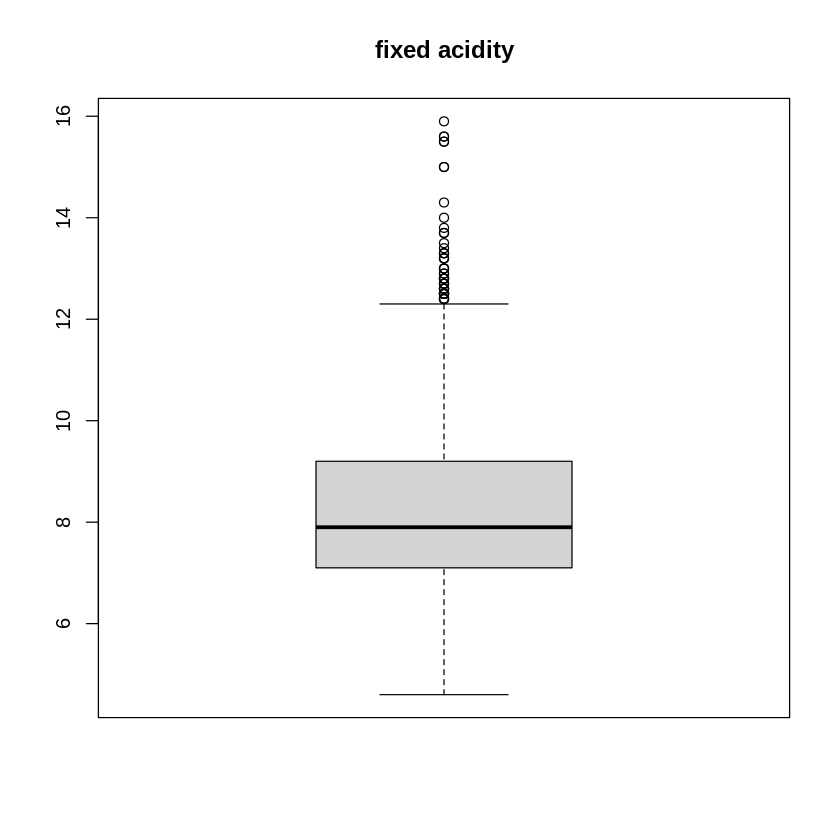

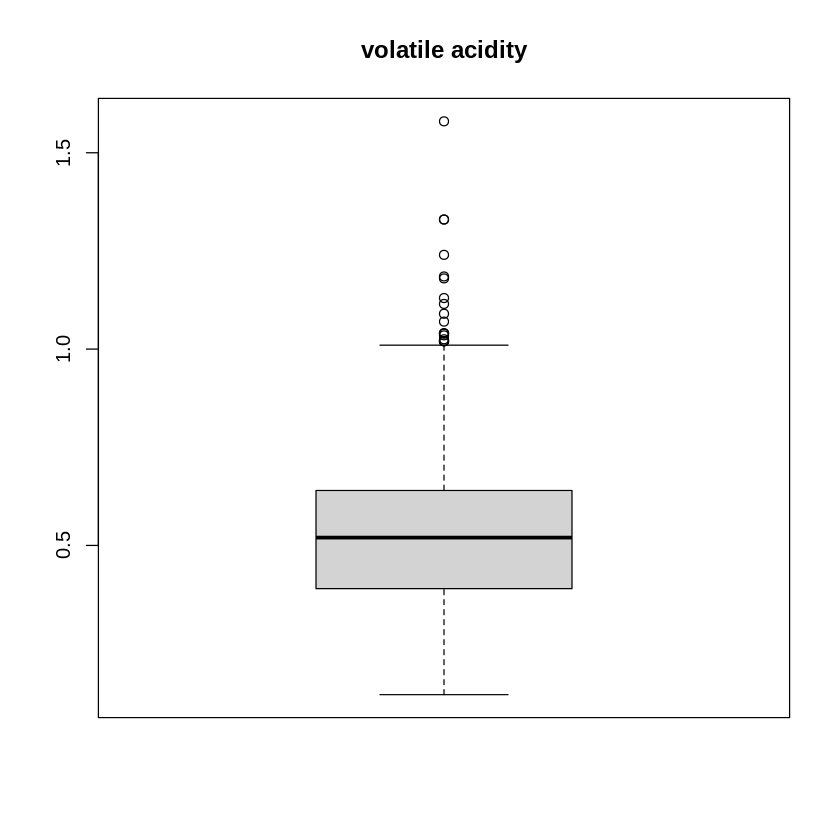

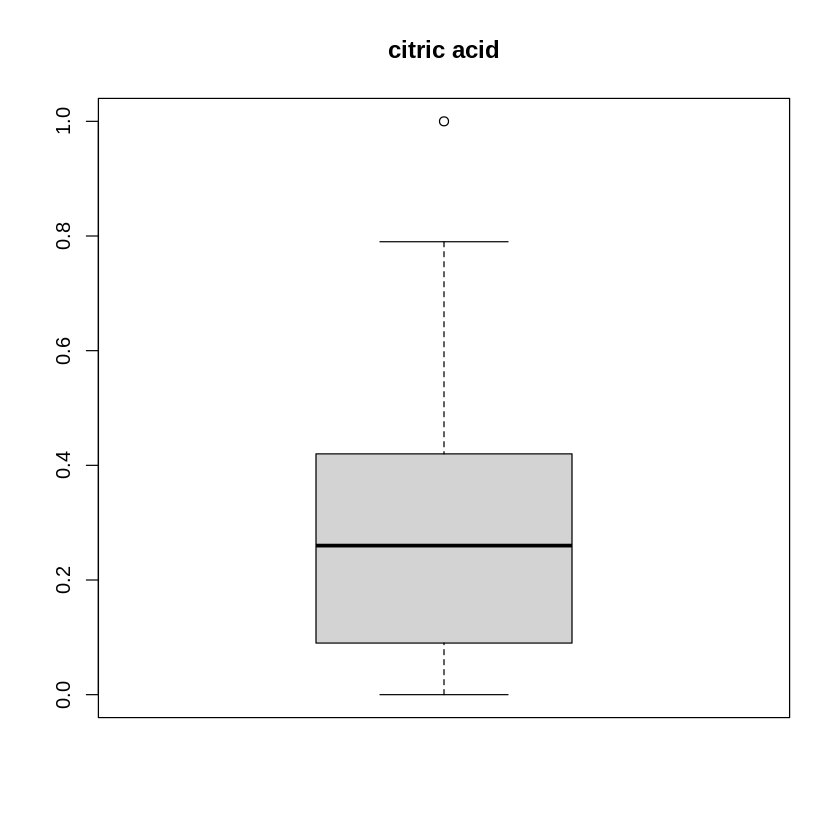

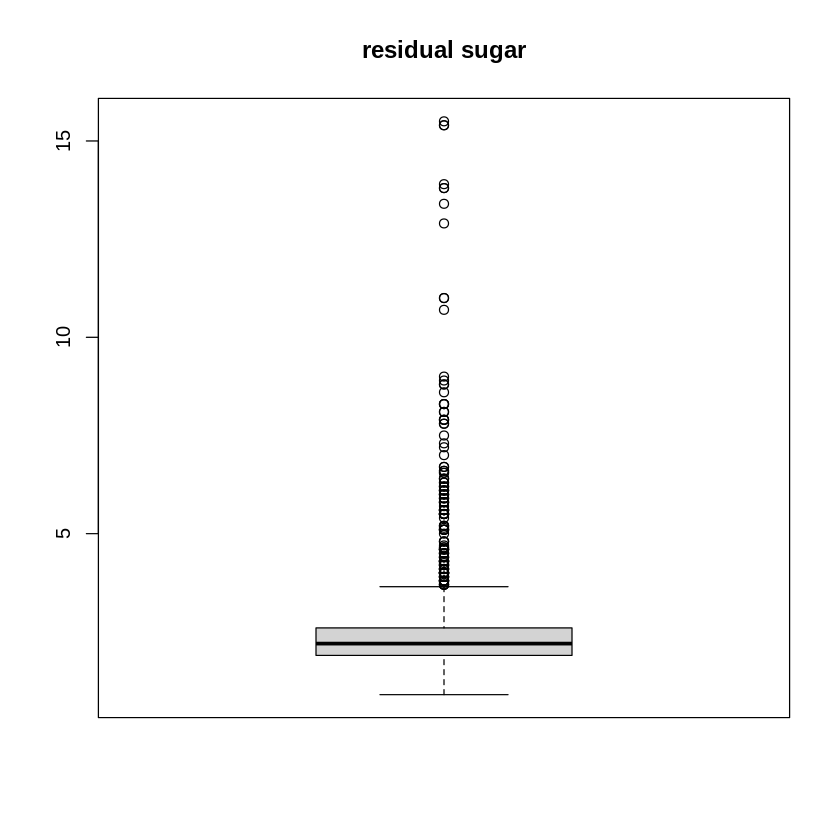

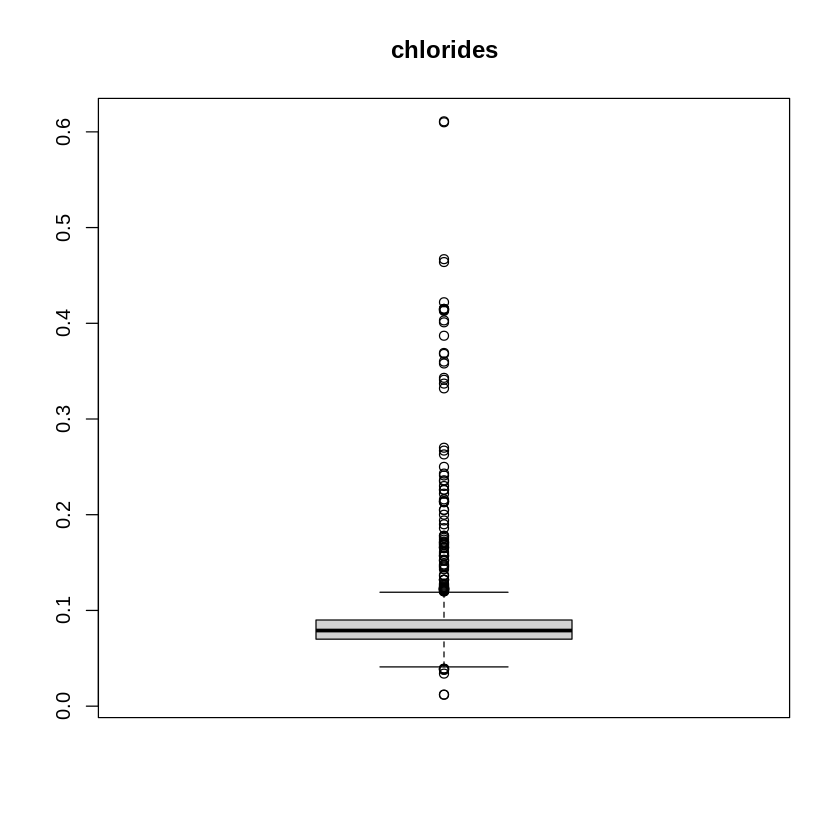

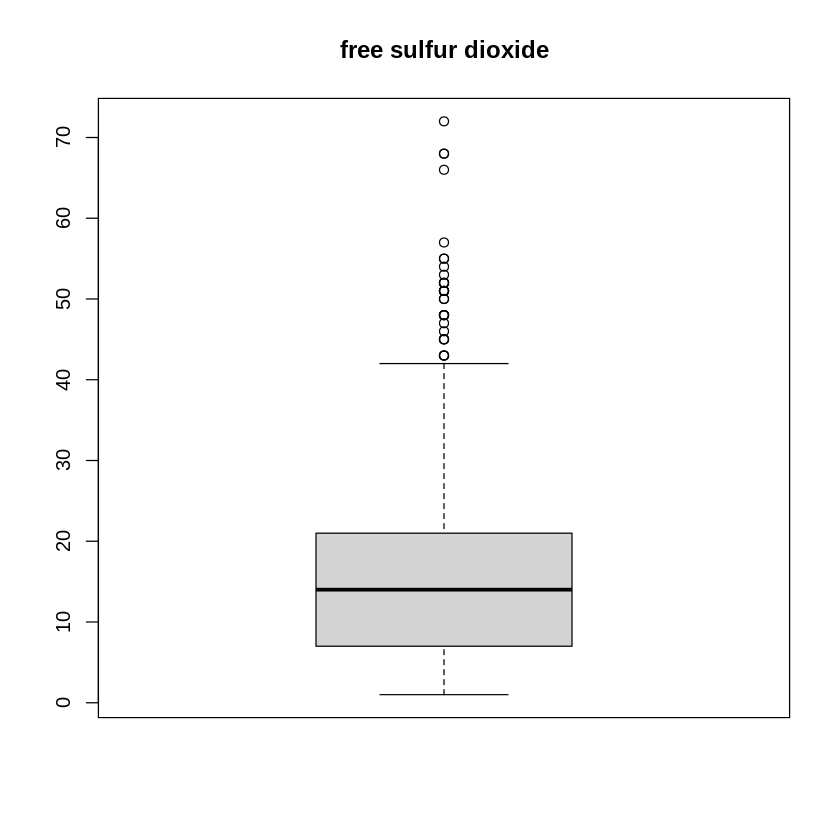

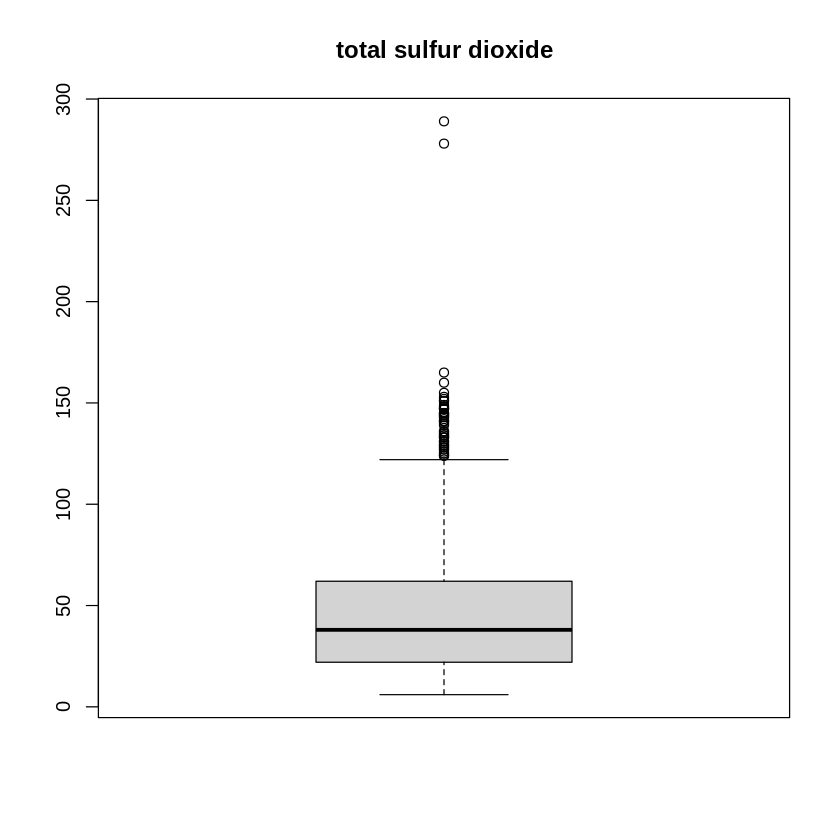

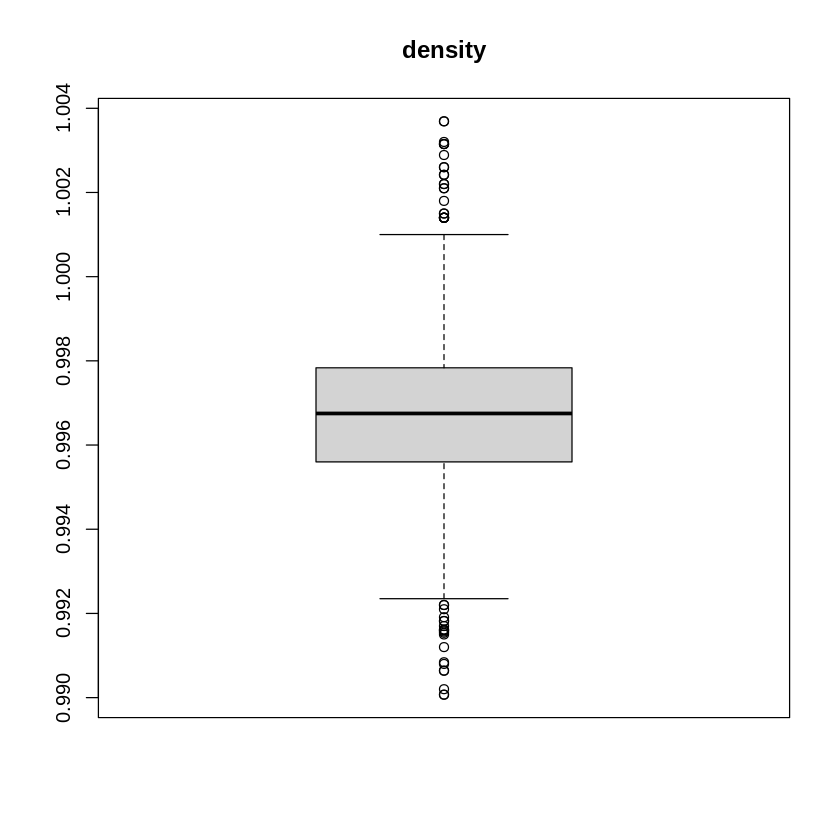

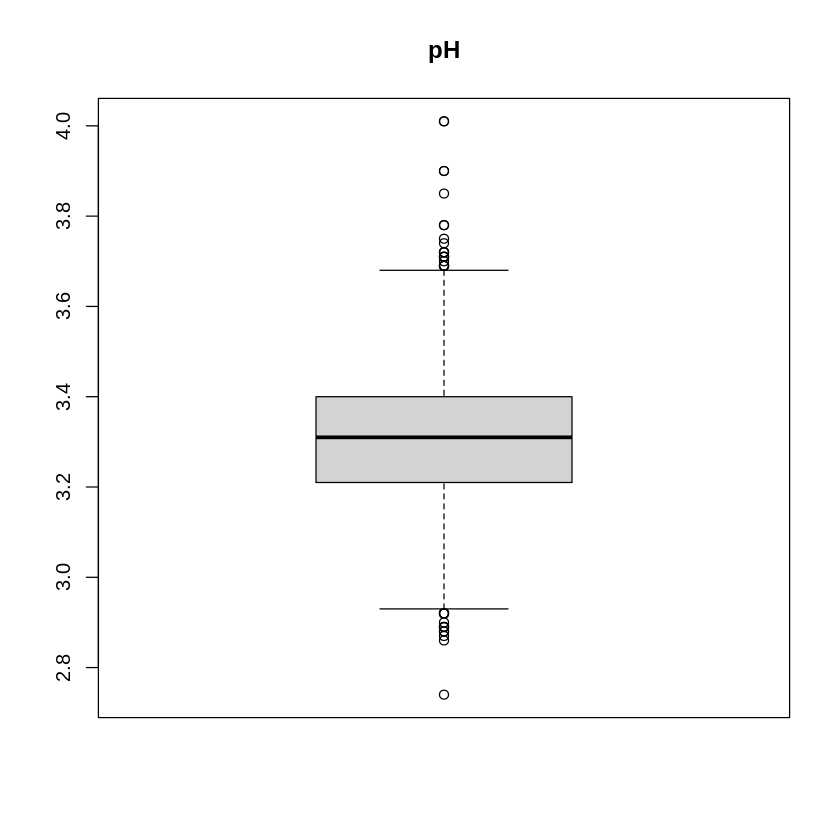

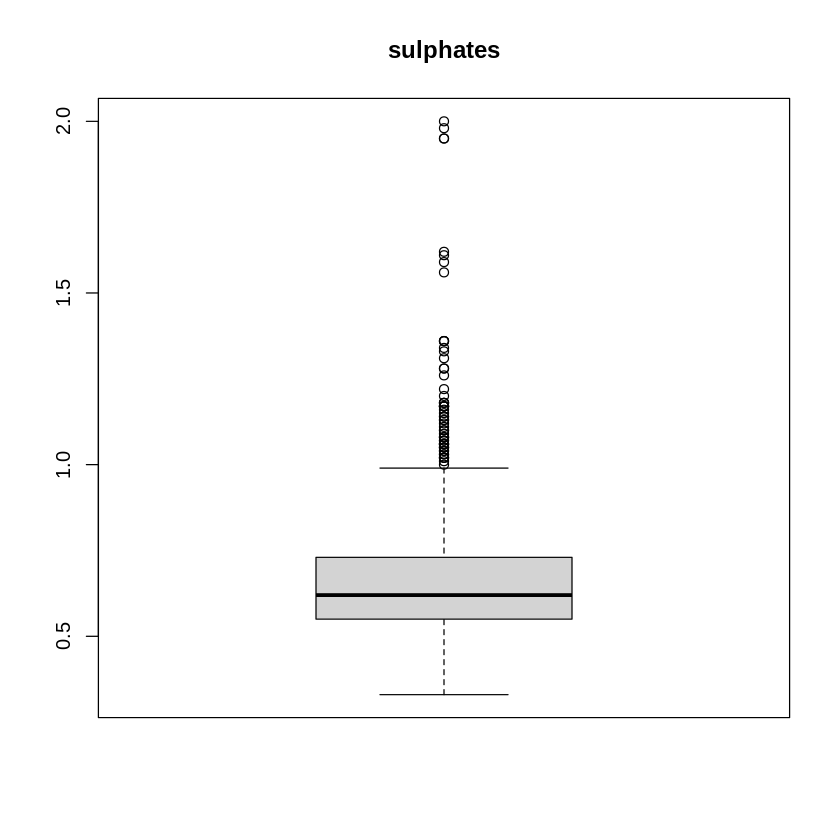

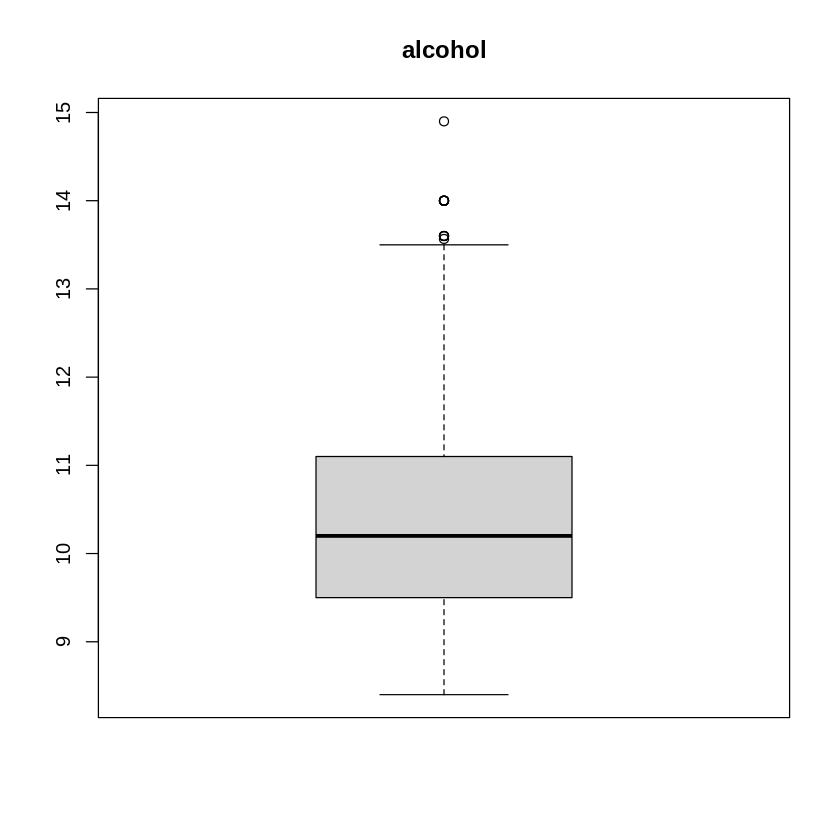

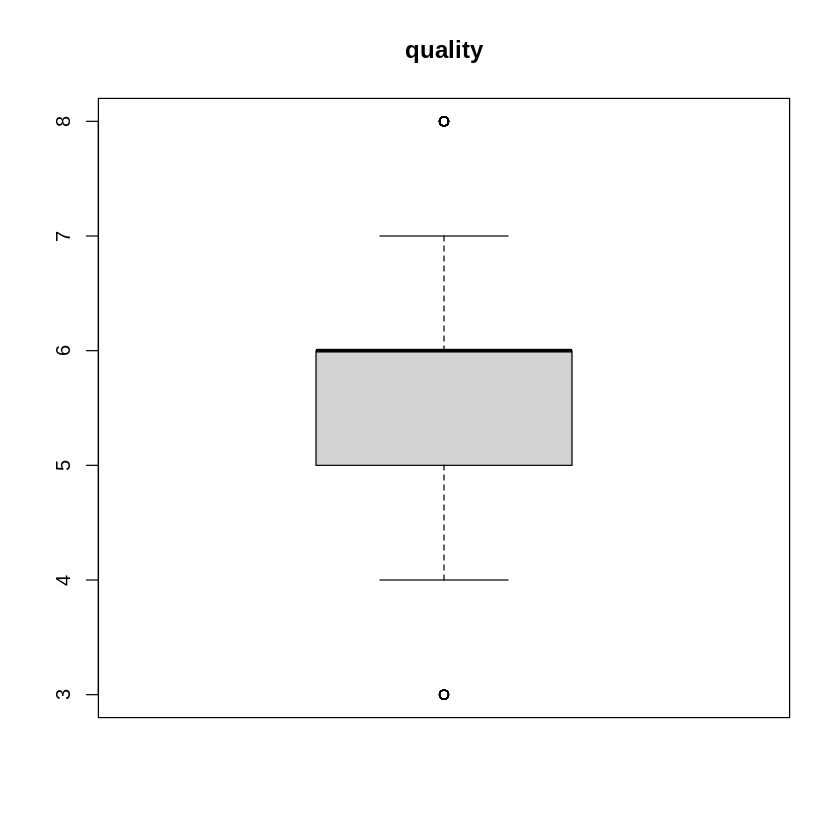

In [15]:
# Create individual box plots for each variable
for (col in colnames(df)) {
  boxplot(df[[col]], main = col)
}

In [16]:
# Define a function to find outliers using Tukey's fences
find_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower_fence <- Q1 - 1.5 * IQR
  upper_fence <- Q3 + 1.5 * IQR
  outliers <- x[x < lower_fence | x > upper_fence]
  return(outliers)
}


In [17]:
# Apply the function to each column in the data frame
outlier_rows <- apply(X, 2, find_outliers)

In [18]:
outlier_rows

$`fixed acidity`
 [1] 12.8 12.8 15.0 15.0 12.5 13.3 13.4 12.4 12.5 13.8 13.5 12.6 12.5 12.8 12.8
[16] 14.0 13.7 13.7 12.7 12.5 12.8 12.6 15.6 12.5 13.0 12.5 13.3 12.4 12.5 12.9
[31] 14.3 12.4 15.5 15.5 15.6 13.0 12.7 13.0 12.7 12.4 12.7 13.2 13.2 13.2 15.9
[46] 13.3 12.9 12.6 12.6

$`volatile acidity`
 [1] 1.130 1.020 1.070 1.330 1.330 1.040 1.090 1.040 1.240 1.185 1.020 1.035
[13] 1.025 1.115 1.020 1.020 1.580 1.180 1.040

$`citric acid`
[1] 1

$`residual sugar`
  [1]  6.10  6.10  3.80  3.90  4.40 10.70  5.50  5.90  5.90  3.80  5.10  4.65
 [13]  4.65  5.50  5.50  5.50  5.50  7.30  7.20  3.80  5.60  4.00  4.00  4.00
 [25]  4.00  7.00  4.00  4.00  6.40  5.60  5.60 11.00 11.00  4.50  4.80  5.80
 [37]  5.80  3.80  4.40  6.20  4.20  7.90  7.90  3.70  4.50  6.70  6.60  3.70
 [49]  5.20 15.50  4.10  8.30  6.55  6.55  4.60  6.10  4.30  5.80  5.15  6.30
 [61]  4.20  4.20  4.60  4.20  4.60  4.30  4.30  7.90  4.60  5.10  5.60  5.60
 [73]  6.00  8.60  7.50  4.40  4.25  6.00  3.90  4.20  4.00  4.00  4.00  6.60
 [85]  6.00  6.00  3.80  9.00  4.60  8.80  8.80  5.00  3.80  4.10  5.90  4.10
 [97]  6.20  8.90  4.00  3.90  4.00  8.10  8.10  6.40  6.40  8.30  8.30  4.70
[109]  5.50  5.50  4.30  5.50  3.70  6.20  5.60  7.80  4.60  5.80  4.10 12.90
[121]  4.30 13.40  4.80  6.30  4.50  4.50  4.30  4.30  3.90  3.80  5.40  3.80
[133]  6.10  3.90  5.10  5.10  3.90 15.40 15.40  4.80  5.20  5.20  3.75 13.80
[145] 13.80  5.70  4.30  4.10  4.10  4.40  3.70  6.70 13.90  5.10  7.80

$chlorides
  [1] 0.176 0.170 0.368 0.341 0.172 0.332 0.464 0.401 0.467 0.122 0.178 0.146
 [13] 0.236 0.610 0.360 0.270 0.039 0.337 0.263 0.611 0.358 0.343 0.186 0.213
 [25] 0.214 0.121 0.122 0.122 0.128 0.120 0.159 0.124 0.122 0.122 0.174 0.121
 [37] 0.127 0.413 0.152 0.152 0.125 0.122 0.200 0.171 0.226 0.226 0.250 0.148
 [49] 0.122 0.124 0.124 0.143 0.222 0.039 0.157 0.422 0.034 0.387 0.415 0.157
 [61] 0.157 0.243 0.241 0.190 0.132 0.126 0.038 0.165 0.145 0.147 0.012 0.012
 [73] 0.039 0.194 0.132 0.161 0.120 0.120 0.123 0.123 0.414 0.216 0.171 0.178
 [85] 0.369 0.166 0.166 0.136 0.132 0.132 0.123 0.123 0.123 0.403 0.137 0.414
 [97] 0.166 0.168 0.415 0.153 0.415 0.267 0.123 0.214 0.214 0.169 0.205 0.205
[109] 0.039 0.235 0.230 0.038

$`free sulfur dioxide`
 [1] 52 51 50 68 68 43 47 54 46 45 53 52 51 45 57 50 45 48 43 48 72 43 51 51 52
[26] 55 55 48 48 66

$`total sulfur dioxide`
 [1] 145 148 136 125 140 136 133 153 134 141 129 128 129 128 143 144 127 126 145
[20] 144 135 165 124 124 134 124 129 151 133 142 149 147 145 148 155 151 152 125
[39] 127 139 143 144 130 278 289 135 160 141 141 133 147 147 131 131 131

$density
 [1] 0.99160 0.99160 1.00140 1.00150 1.00150 1.00180 0.99120 1.00220 1.00220
[10] 1.00140 1.00140 1.00140 1.00140 1.00320 1.00260 1.00140 1.00315 1.00315
[19] 1.00315 1.00210 1.00210 0.99170 0.99220 1.00260 0.99210 0.99154 0.99064
[28] 0.99064 1.00289 0.99162 0.99007 0.99007 0.99020 0.99220 0.99150 0.99157
[37] 0.99080 0.99084 0.99191 1.00369 1.00369 1.00242 0.99182 1.00242 0.99182

$pH
 [1] 3.90 3.75 3.85 2.74 3.69 3.69 2.88 2.86 3.74 2.92 2.92 2.92 3.72 2.87 2.89
[16] 2.89 2.92 3.90 3.71 3.69 3.69 3.71 3.71 2.89 2.89 3.78 3.70 3.78 4.01 2.90
[31] 4.01 3.71 2.88 3.72 3.72

$sulphates
 [1] 1.56 1.28 1.08 1.20 1.12 1.28 1.14 1.95 1.22 1.95 1.98 1.31 2.00 1.08 1.59
[16] 1.02 1.03 1.61 1.09 1.26 1.08 1.00 1.36 1.18 1.13 1.04 1.11 1.13 1.07 1.06
[31] 1.06 1.05 1.06 1.04 1.05 1.02 1.14 1.02 1.36 1.36 1.05 1.17 1.62 1.06 1.18
[46] 1.07 1.34 1.16 1.10 1.15 1.17 1.17 1.33 1.18 1.17 1.03 1.17 1.10 1.01

$alcohol
 [1] 14.00000 14.00000 14.00000 14.00000 14.90000 14.00000 13.60000 13.60000
 [9] 13.60000 14.00000 14.00000 13.56667 13.60000

In [19]:
ncol(outlier_rows)

NULL

In [20]:
# Define a function to remove outliers using Tukey's fences
remove_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower_fence <- Q1 - 1.5 * IQR
  upper_fence <- Q3 + 1.5 * IQR
  outliers <- x < lower_fence | x > upper_fence
  x_filtered <- x[!outliers]
  return(x_filtered)
}


In [21]:
count(X)

n   
1 1599

In [22]:
# Remove outliers from each column separately
filtered_columns <- lapply(X, remove_outliers)

In [23]:
# Find the common row indices for the filtered columns
common_rows <- Reduce(intersect, lapply(filtered_columns, function(x) seq_along(x)))

In [24]:
# Create a new data frame with filtered values
df_filtered <- data.frame(lapply(filtered_columns, `[`, common_rows))

In [25]:
count(df_filtered)

n   
1 1444

In [26]:
# Create a sample data frame
df_m <- as.matrix(df_filtered)

In [27]:
# Find null values in df_m
null_values <- is.na(df_m)
# Count the number of null values in each column
column_null_counts <- colSums(null_values)

# Count the number of null values in each row
row_null_counts <- rowSums(null_values)

# Print the results
print(column_null_counts)
print(row_null_counts)

       fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol 
                   0                    0 
   [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# 3. Visualization<a id='visualization'></a>

In [28]:
library(corrplot)

corrplot 0.92 loaded



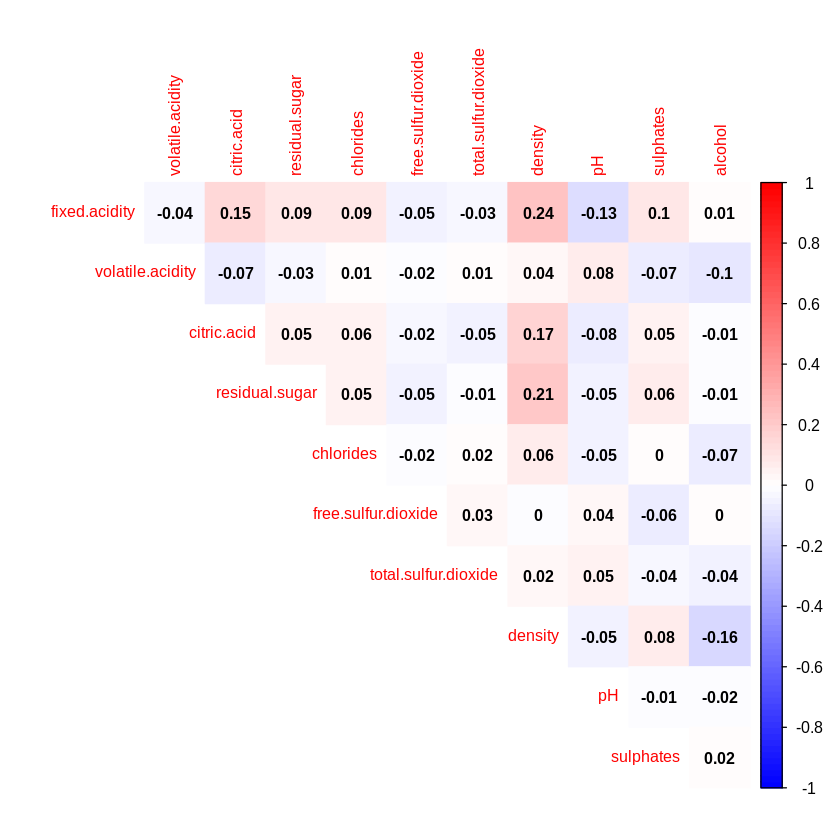

In [29]:
# Create a heatmap using the heatmap() function
corrplot(cor(df_m, method = "pearson"), 
         type = "upper",     # Show only the upper triangle of the correlation matrix
         tl.cex = 0.8,       # Adjust the size of the correlation value labels
         diag = FALSE,       # Hide the diagonal line
         method = "color",   # Color-code the correlation values
         addCoef.col = "black",  # Color of the correlation value labels
         col = colorRampPalette(c("blue", "white", "red"))(100),  # Custom color palette
         number.cex = 0.8)  # Adjust the size of the correlation value text

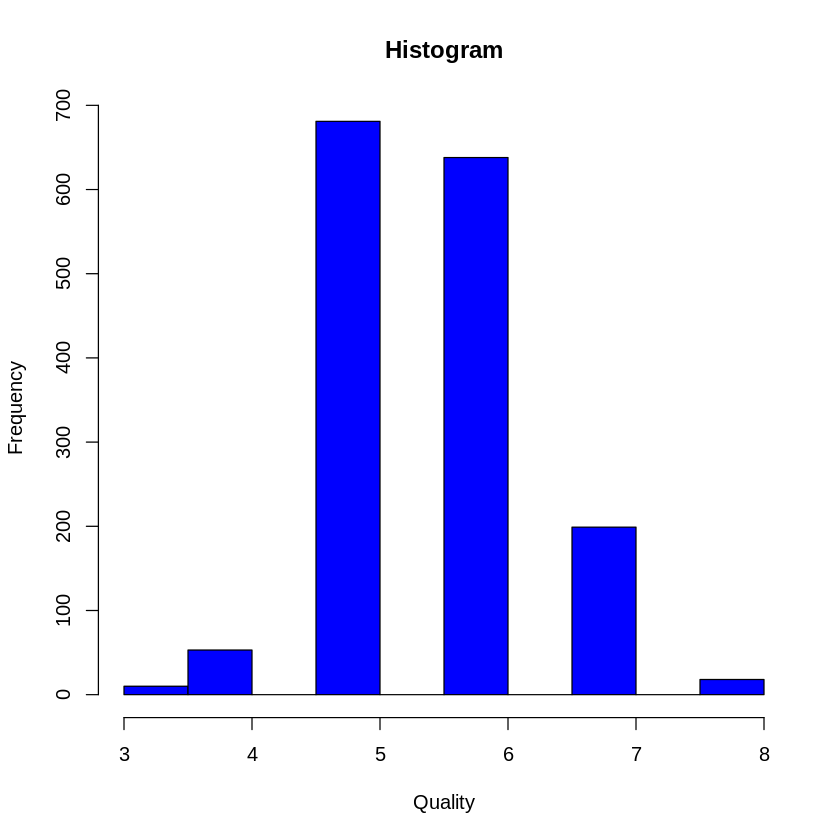

In [30]:
#print the distribution of quality
hist(y, col = "blue", main = "Histogram", xlab = "Quality")

# Proposed Combo graph

#### The provided grouped bar plots can be relevant in addressing the question of predicting the quality rating of red wine based on its chemical properties. Here's a justification for their relevance and an insightful interpretation of the visualization:

- Comparison of variable values: The grouped bar plots allow for a visual comparison of the chemical properties (explanatory variables) across different levels of the quality rating (response variable). By examining the heights of the bars within each group, we can observe how the values of acidity, pH level, alcohol content, and volatile acidity vary based on different quality ratings.

- Relationship identification: The plots help identify potential relationships between the explanatory variables and the quality rating. For example, if we observe consistent patterns in the bar heights across different quality levels, it suggests that the chemical property may have a significant influence on the quality rating. Conversely, if there is no clear distinction in the bar heights, it implies that the variable may not be strongly associated with the quality rating.

- Outlier detection: By examining the bar heights, we can identify outliers in the chemical properties for specific quality levels. Outliers may indicate unusual or extreme values that could potentially impact the quality rating. Detecting outliers can help in understanding the potential impact of specific chemical properties on the quality rating.

- Variable importance: By comparing the relative heights of the bars among the explanatory variables, we can gain insights into the relative importance of each variable in predicting the quality rating. If a particular variable consistently exhibits noticeable differences in bar heights across quality levels, it suggests that it may be a significant predictor of the quality rating.

- Exploration of relationships: The plots provide an initial exploration of the relationships between the chemical properties and the quality rating. By visually examining the bar heights and patterns, we can form initial hypotheses about which chemical properties may have a stronger influence on the quality rating and warrant further investigation.

Overall, the grouped bar plots offer a visual representation that aids in exploring the relationships between the chemical properties and the quality rating of red wine. They provide insights into potential patterns, outliers, and variable importance, which can guide further analysis and modeling efforts to predict the quality rating based on the given explanatory variables.

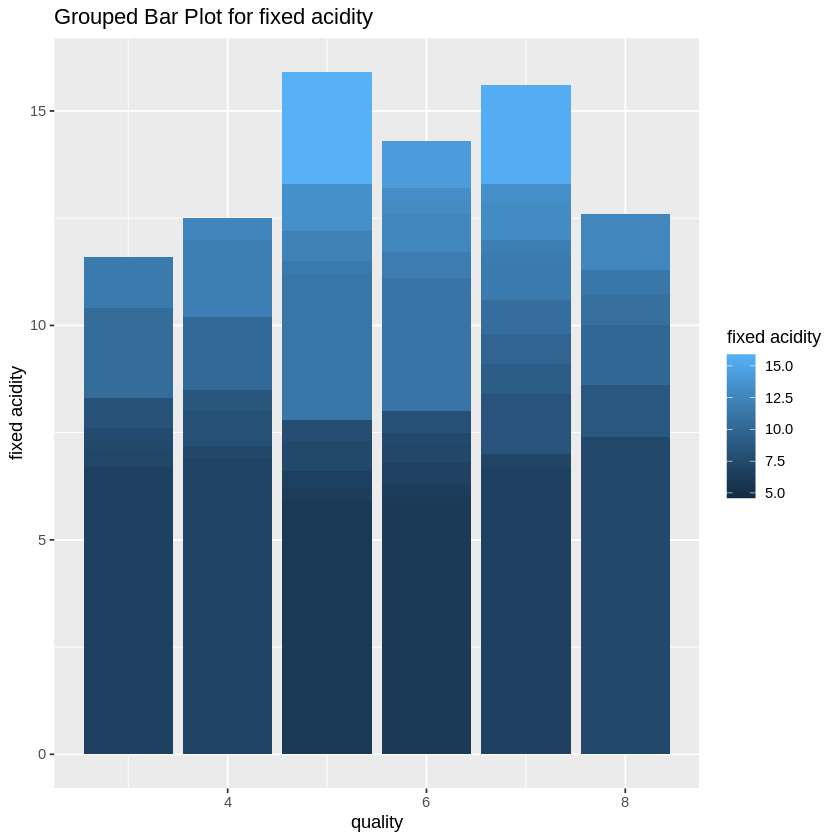

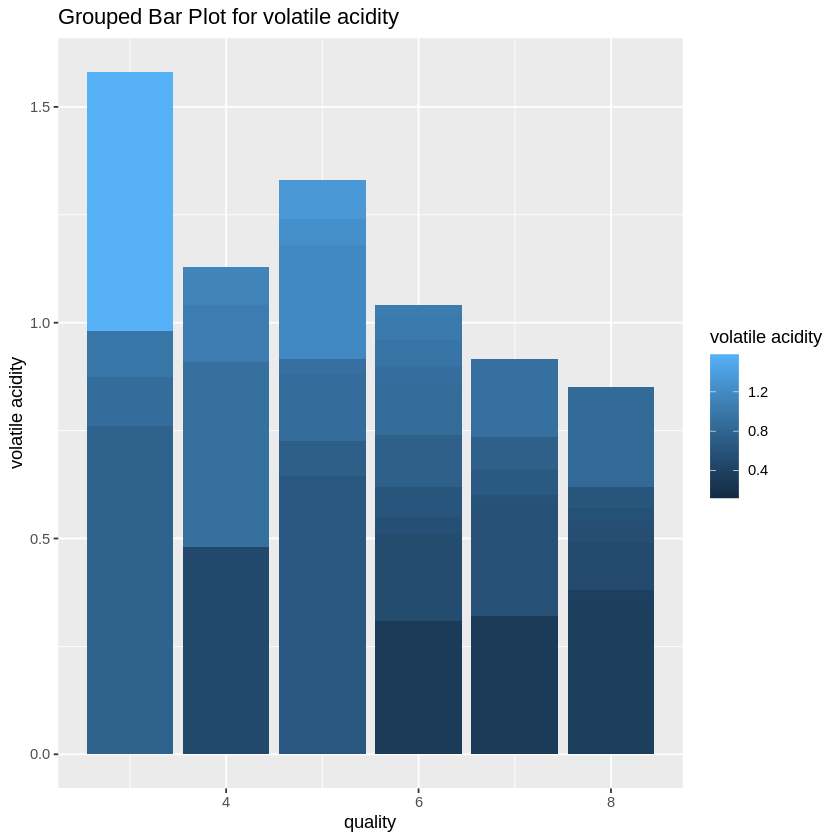

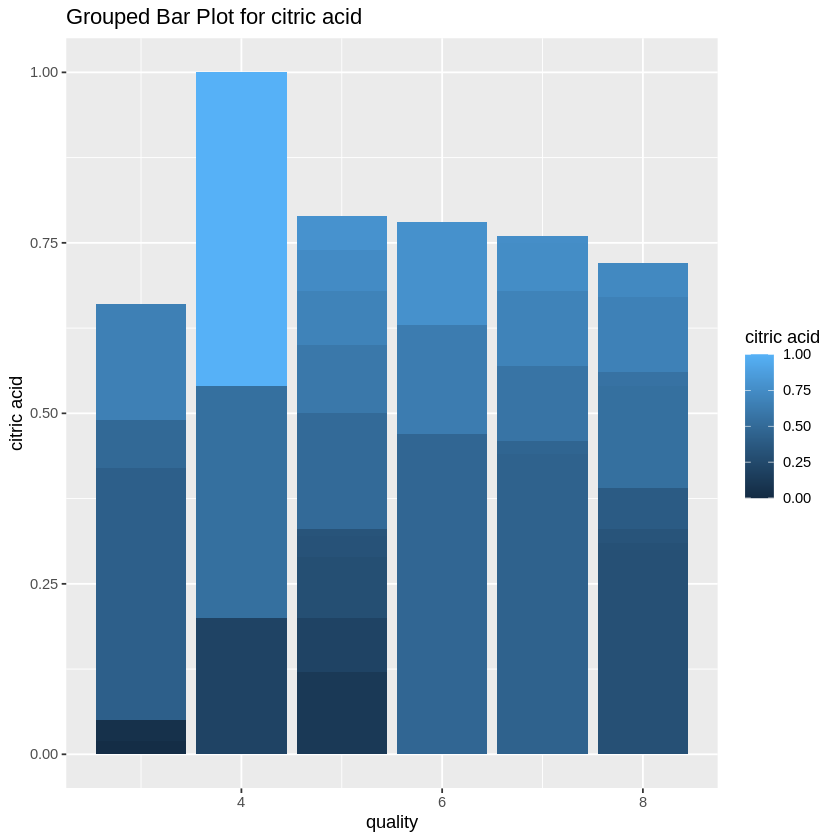

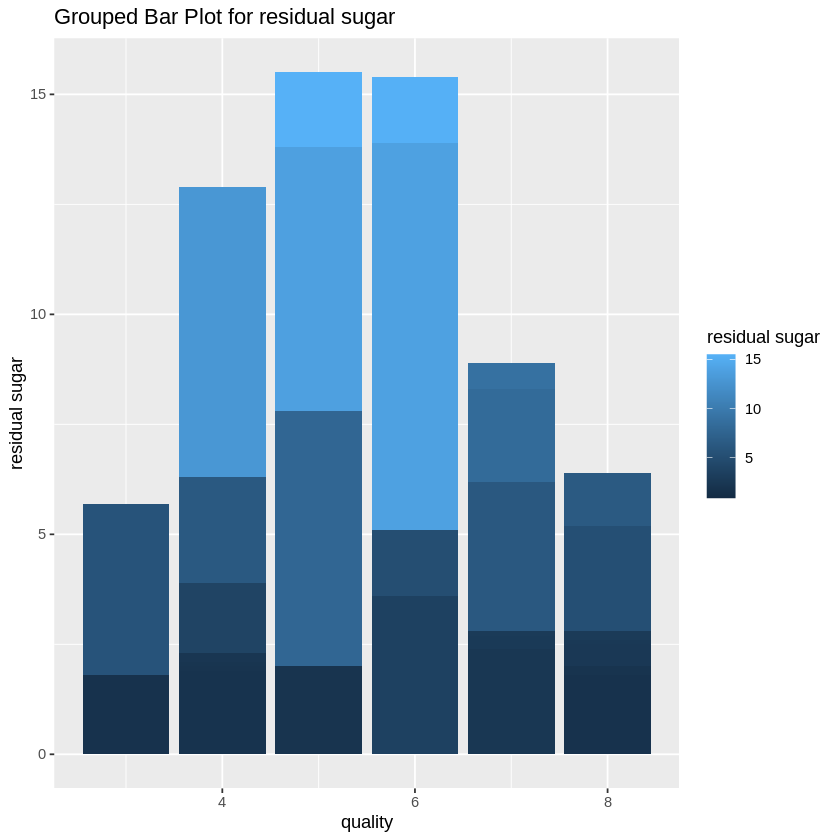

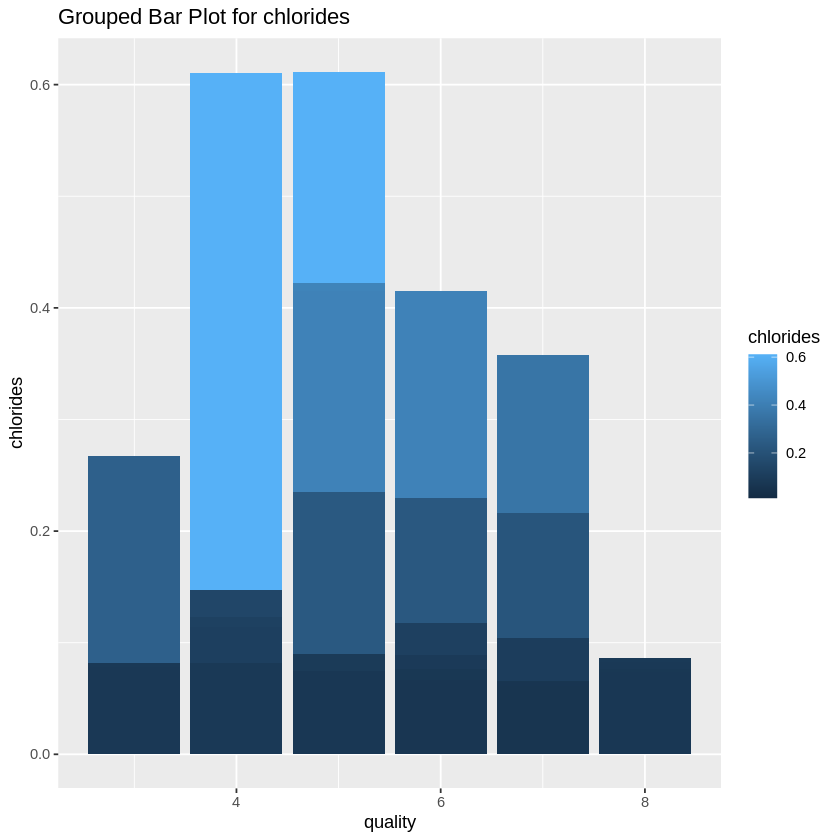

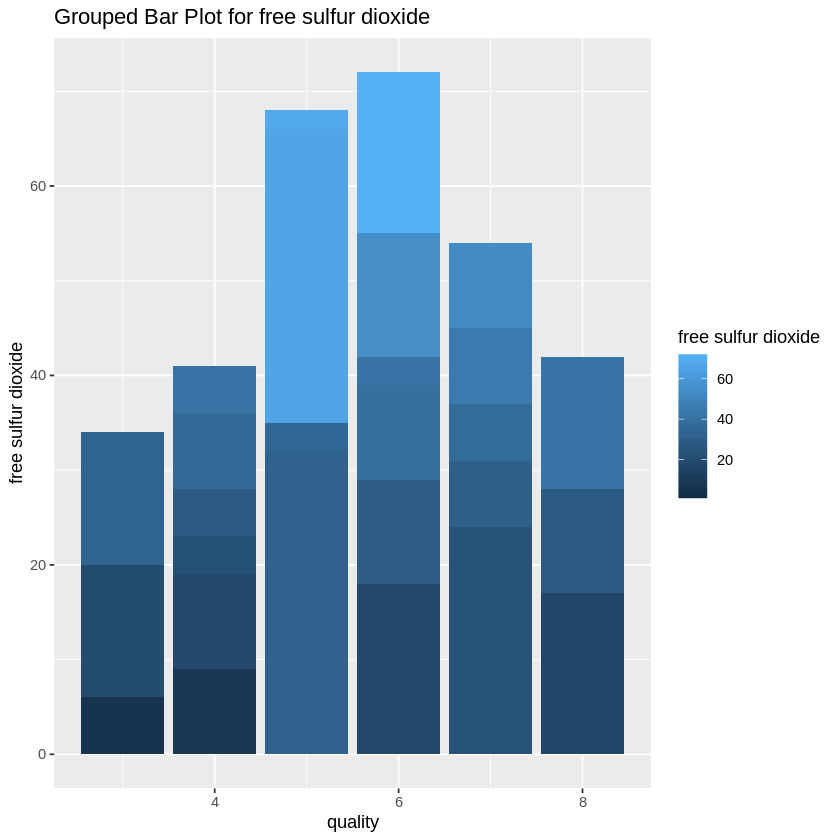

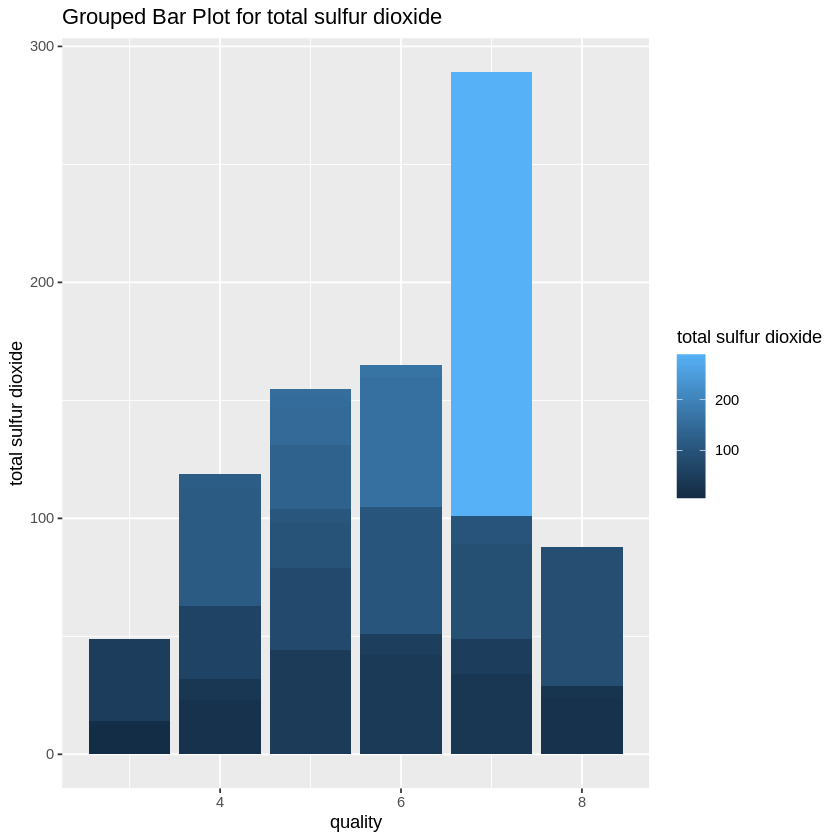

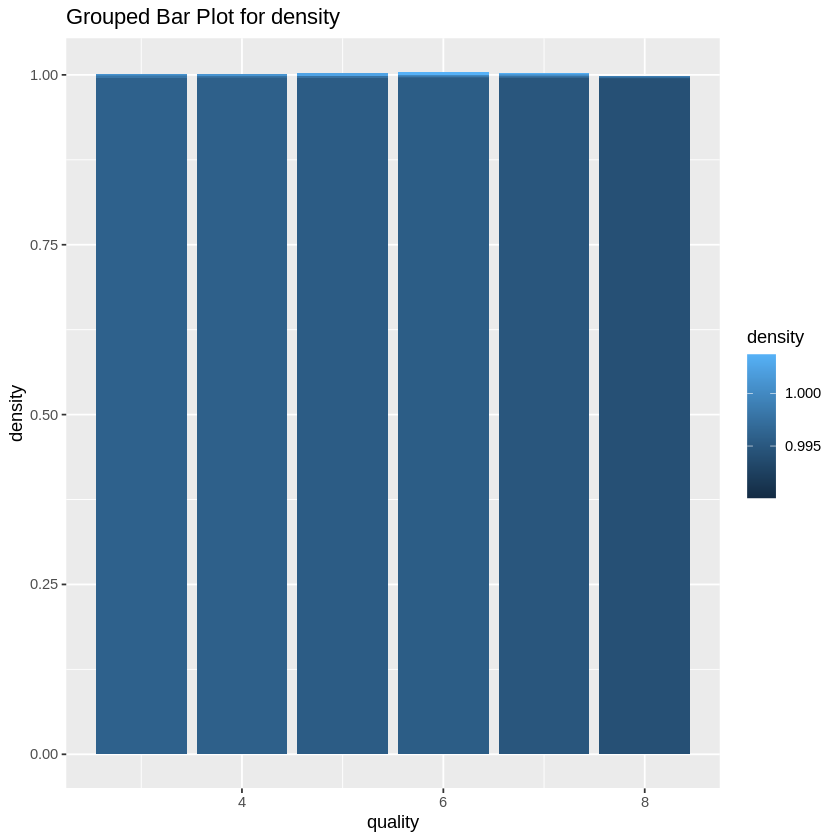

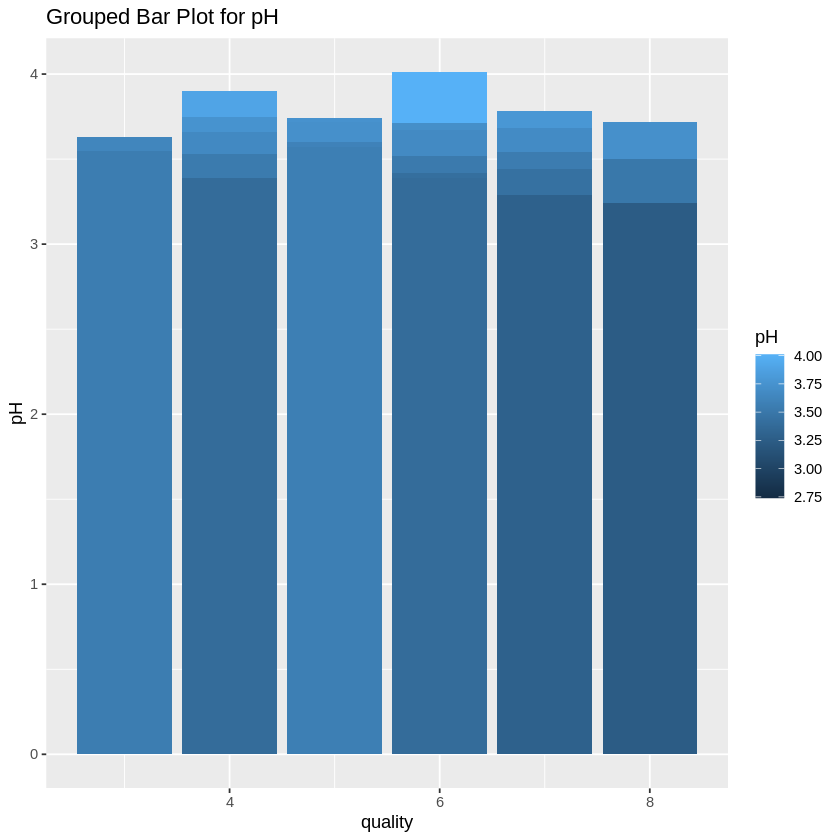

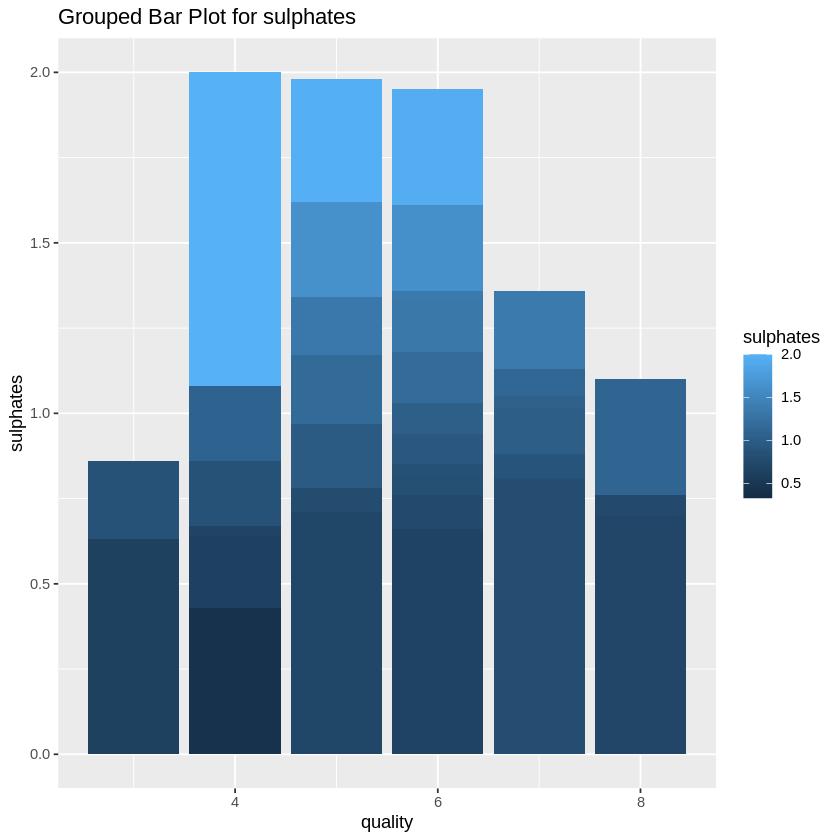

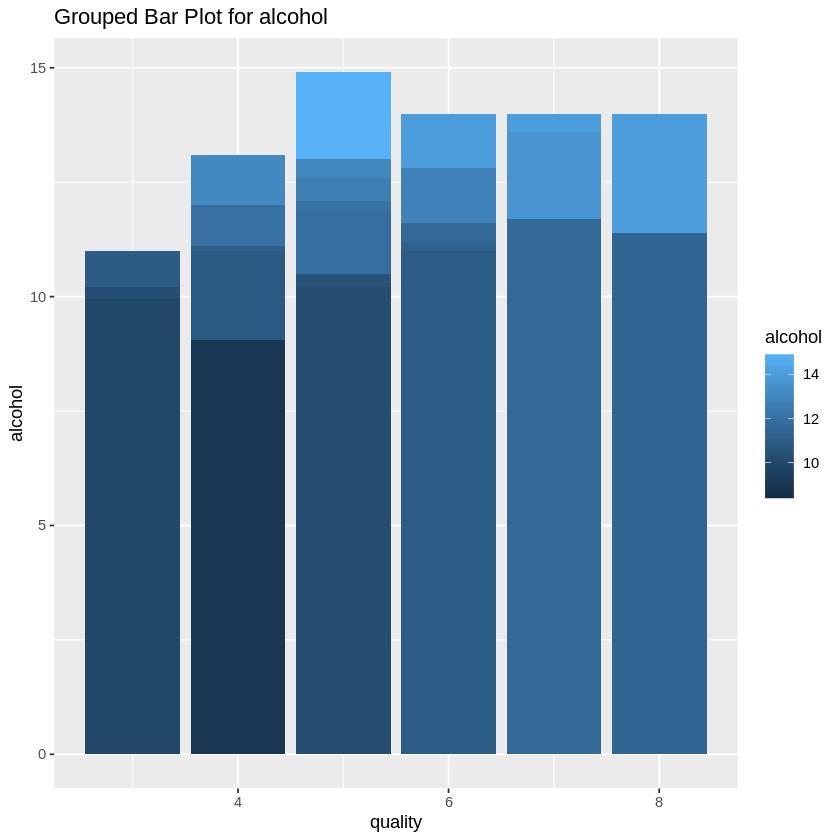

In [31]:
# Iterate through each variable in X
for (var in names(X)) {
  # Create a grouped bar plot for the current variable
  plot <- ggplot(df, aes(x = quality, y = .data[[var]], fill = .data[[var]])) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = paste("Grouped Bar Plot for", var))
  
  # Print the plot
  print(plot)
}

### Interpretation

Comparison of variable values: we can see from the bar graphs that fixed acidity, volatile acidity, Citric acid, density, pH, and alcohol are evenly spread and total sulphur dioxide, free sulphur dioxide, chlorides, residual sugar are sort of normally spread.

Relationship identification: based on comparison, those who are not very evenly spread could be the variables that strongly influence the ratings.

Outliers detection: we could see that most density are below 1, with tiny proportion greater than 1.

Variable importance: We can use the heights of the bars to determine

Exploration of relationships: we can see from the histogram of the response variable that it is quite normal distributed with few very large or very small values. Comparing the distribution of the shapes may give us valuable results.


I believe that this graph help us determine which feature is important for us to answer our question and what are the relationships between each features. 
